# **Activity Detection**

Part 2

Data source: https://www.kaggle.com/datasets/luisomoreau/activity-detection

Our data consists of 12 folders, where each folder represents one activity. In each folder (except one), there are 12 CSV files with data. Each CSV file corresponds to one sensor that recorded the data. A description of the files with their values is provided below.

**Acceleration (Accelerometer)**
- Accelerometer_z: Acceleration along the Z-axis.
- Accelerometer_y: Acceleration along the Y-axis.
- Accelerometer_x: Acceleration along the X-axis.

**Annotation** - empty  


**Gravity**
- Gravity_z: Gravity vector component along the Z-axis.
- Gravity_y: Gravity vector component along the Y-axis.
- Gravity_x: Gravity vector component along the X-axis.

**Gyroscope**
- Gyroscope_z: Angular velocity around the Z-axis.
- Gyroscope_y: Angular velocity around the Y-axis.
- Gyroscope_x: Angular velocity around the X-axis.

**Location**
- Location_bearingAccuracy: Bearing (azimuth) accuracy in location.
- Location_speedAccuracy: Speed accuracy in location.
- Location_verticalAccuracy: Altitude accuracy in location.
- Location_horizontalAccuracy: Horizontal accuracy in location.
- Location_speed: Speed in location.
- Location_bearing: Bearing (azimuth) in location.
- Location_altitude: Altitude in location.
- Location_longitude: Longitude in location.
- Location_latitude: Latitude in location.

**Metadata** - additional data

**GPS (LocationGps)**
- LocationGps_bearingAccuracy: Bearing (azimuth) accuracy obtained from GPS.
- LocationGps_speedAccuracy: Speed accuracy obtained from GPS.
- LocationGps_verticalAccuracy: Altitude accuracy obtained from GPS.
- LocationGps_horizontalAccuracy: Horizontal accuracy obtained from GPS.
- LocationGps_speed: Speed obtained from GPS.
- LocationGps_bearing: Bearing (azimuth) obtained from GPS.
- LocationGps_altitude: Altitude obtained from GPS.
- LocationGps_longitude: Longitude obtained from GPS.
- LocationGps_latitude: Latitude obtained from GPS.

**Network Location (LocationNetwork)**
- LocationNetwork_bearingAccuracy: Bearing (azimuth) accuracy obtained from the network.
- LocationNetwork_speedAccuracy: Speed accuracy obtained from the network.
- LocationNetwork_verticalAccuracy: Altitude accuracy obtained from the network.
- LocationNetwork_horizontalAccuracy: Horizontal accuracy obtained from the network.
- LocationNetwork_speed: Speed obtained from the network.
- LocationNetwork_bearing: Bearing (azimuth) obtained from the network.
- LocationNetwork_altitude: Altitude obtained from the network.
- LocationNetwork_longitude: Longitude obtained from the network.
- LocationNetwork_latitude: Latitude obtained from the network.

**Magnetometer**
- Magnetometer_z: Magnetic field strength along the Z-axis.
- Magnetometer_y: Magnetic field strength along the Y-axis.
- Magnetometer_x: Magnetic field strength along the X-axis.

**Orientation**
- Orientation_qz: Z component of the quaternion representing orientation.
- Orientation_qy: Y component of the quaternion representing orientation.
- Orientation_qx: X component of the quaternion representing orientation.
- Orientation_qw: W component of the quaternion representing orientation.
- Orientation_roll: Roll angle of the orientation.
- Orientation_pitch: Pitch angle of the orientation.
- Orientation_yaw: Yaw angle of the orientation.

**Pedometer**
- Pedometer_steps: Number of steps recorded by the pedometer.

**Total Acceleration**
- TotalAcceleration_z: Total acceleration along the Z-axis.
- TotalAcceleration_y: Total acceleration along the Y-axis.
- TotalAcceleration_x: Total acceleration along the X-axis.

## **BUSINESS GOAL**

We work for a company that makes devices for athletes (like sports watches) that track physical activities. Using sensors, they collect data such as speed and location from each activity separately. The user doesn't select the type of activity - the smart system just knows when they start doing something. This way, we get a bunch of activities with different data points. We want to cluster these activities to figure out what kinds of activities our users prefer and when they do them. This can be used for more personalized ads or for classification problems.

## **EDA**

### Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import math
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


warnings.filterwarnings("ignore")

### Reading prepared in part 1 csv file

In [2]:
result = pd.read_csv("..//final_data//result_data.csv")
Y_train = pd.read_csv("..//final_data//Y_train.csv")

### Some info about data frame

In [3]:
result

,id,total_time,mean_speed,max_speed,min_speed,total_distance,mean_acceleration,max_acceleration,min_acceleration,sd_acceleration,...,average_pitch,median_pitch,min_pitch,max_pitch,sd_pitch,average_yaw,median_yaw,min_yaw,max_yaw,sd_yaw
0,1.0,2.516568,5.173939e+00,5.899335e+00,4.268667e+00,0.004106,11.128816,30.661771,2.006561,3.732603,...,1.146609,1.183848,0.704922,1.392257,0.161337,0.348759,0.502064,-0.924110,0.842999,0.340052
1,2.0,2.516605,3.189363e+00,6.976449e+00,6.043512e-02,0.001748,9.987097,19.097394,3.318487,2.310040,...,0.570222,0.463072,0.257484,0.983648,0.243520,0.503290,0.510557,0.154463,0.976687,0.135715
2,4.0,2.516632,1.808818e+01,1.858205e+01,1.777709e+01,0.015276,9.887447,15.586205,3.166203,2.411183,...,0.861837,0.909612,0.505585,1.194841,0.201466,0.862720,0.846313,0.730423,1.069733,0.087143
3,6.0,2.516546,2.345041e+01,2.522632e+01,2.065492e+01,0.020659,10.165091,27.075988,1.991092,3.804351,...,0.905452,0.955169,0.549870,1.218063,0.200869,0.904471,0.865037,0.692381,1.169990,0.113996
4,7.0,2.516518,2.408345e+01,2.522632e+01,2.356563e+01,0.013338,9.919805,33.370849,2.437895,4.656513,...,0.983790,1.084632,0.555272,1.180261,0.206061,0.926043,0.940593,0.722495,1.136638,0.098998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2775.0,2.516890,6.613088e-34,1.783098e-33,1.065754e-35,0.000000,9.711081,10.157193,9.186334,0.083760,...,-0.255835,-0.256091,-0.269688,-0.245472,0.004029,2.799125,2.799175,2.785836,2.820665,0.006570
1358,2776.0,2.516883,2.389216e-36,1.065754e-35,2.291695e-39,0.000000,9.713042,10.172372,9.214315,0.111261,...,-0.260877,-0.256462,-0.307705,-0.236793,0.013606,2.770419,2.778999,2.704930,2.806852,0.033515
1359,2777.0,2.516877,8.063703e-40,2.291695e-39,3.944935e-42,0.000000,9.713457,9.876455,9.330433,0.043896,...,-0.250566,-0.250087,-0.258994,-0.245895,0.002698,2.737599,2.740781,2.725769,2.745026,0.006032
1360,2778.0,2.516874,9.794135e-43,3.944935e-42,0.000000e+00,0.000000,9.747030,12.981812,7.583295,0.482260,...,-0.246482,-0.245037,-0.314204,-0.229960,0.008723,2.727584,2.732468,2.577463,2.743785,0.023602


In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1362 non-null   float64
 1   total_time         1362 non-null   float64
 2   mean_speed         1362 non-null   float64
 3   max_speed          1362 non-null   float64
 4   min_speed          1362 non-null   float64
 5   total_distance     1362 non-null   float64
 6   mean_acceleration  1362 non-null   float64
 7   max_acceleration   1362 non-null   float64
 8   min_acceleration   1362 non-null   float64
 9   sd_acceleration    1362 non-null   float64
 10  mean_gyroscope     1362 non-null   float64
 11  mean_magnetometer  1362 non-null   float64
 12  steps_per_minute   1362 non-null   float64
 13  total_steps        1362 non-null   float64
 14  average_roll       1362 non-null   float64
 15  median_roll        1362 non-null   float64
 16  min_roll           1362 

### Histograms for every column

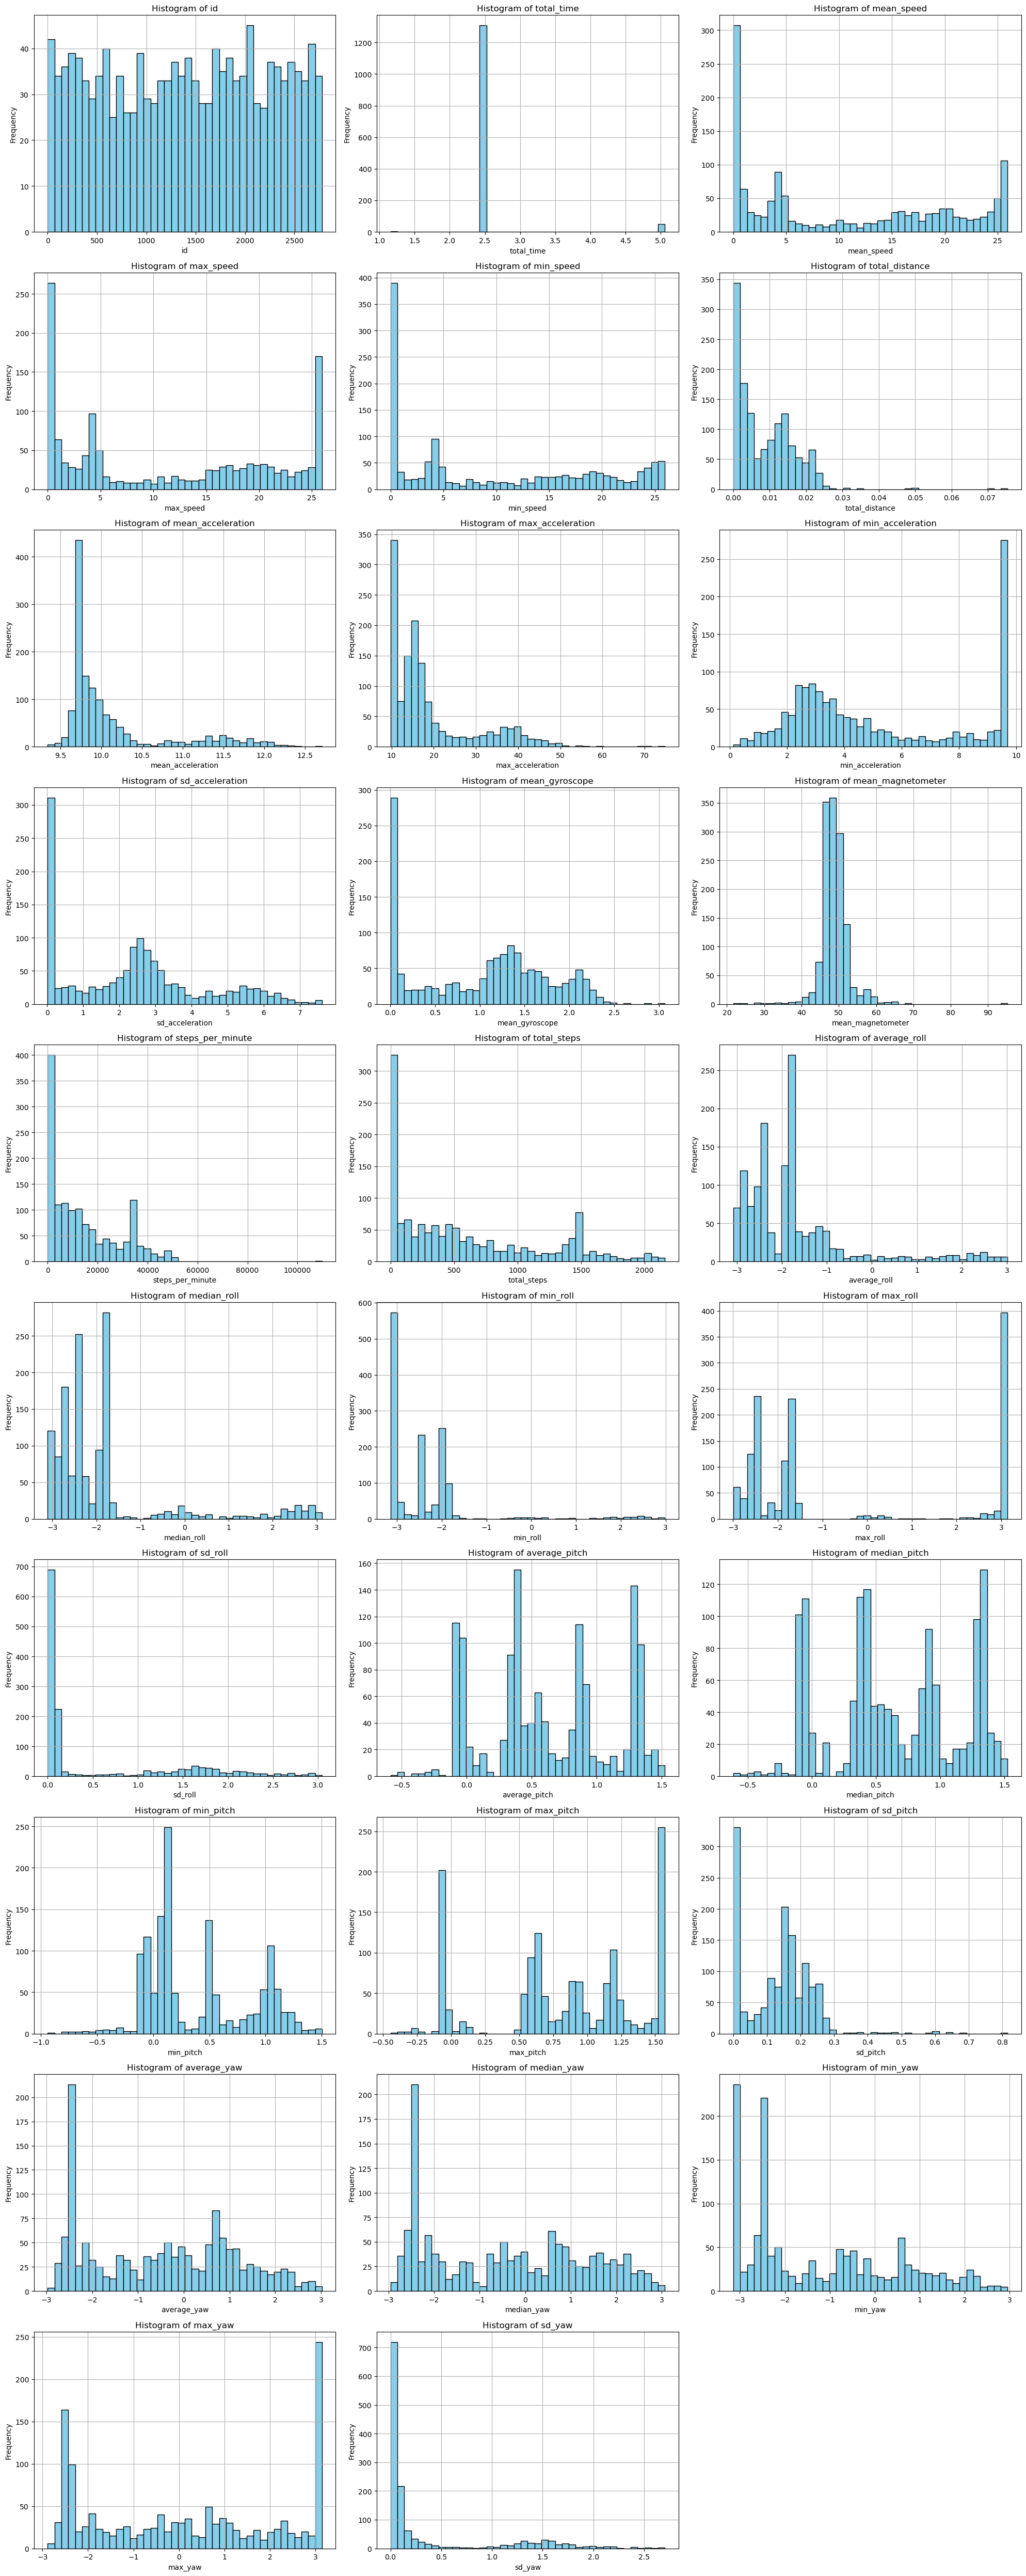

In [5]:
num_columns = len(result.columns)
num_rows = (num_columns + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

for i, column in enumerate(result.columns):
    axes[i].hist(result[column], bins=40, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print()
print()


### Heatmap of correlation

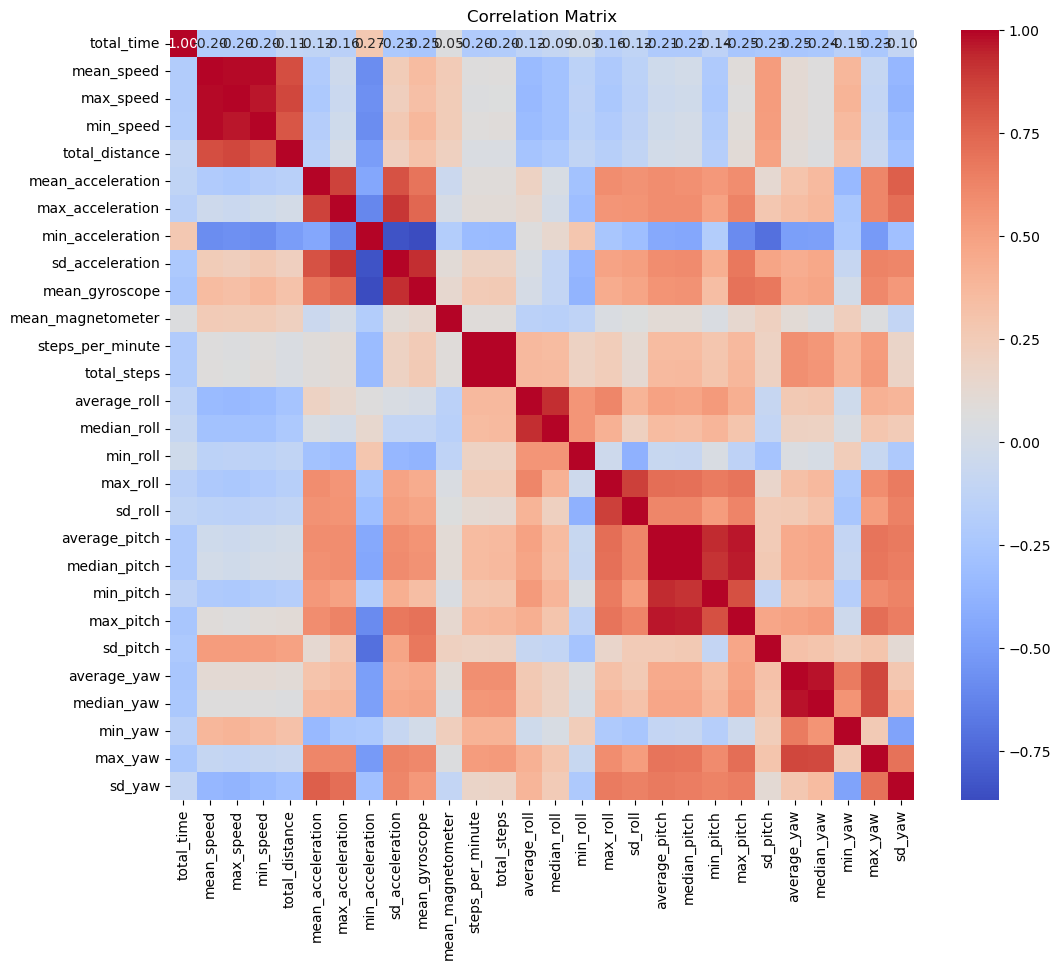

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(result.loc[:,result.columns != 'id'].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Dropping correlated columns

In [7]:
reduced_result = result.drop(columns=['sd_yaw', 'min_speed', 'total_steps', 'max_speed', 'min_pitch', 'total_distance', 'median_roll', 'max_yaw', 'median_yaw', 'average_yaw', 'sd_pitch', 'max_pitch', 'average_pitch', 'max_acceleration', 'min_acceleration', 'mean_gyroscope', 'max_roll', 'min_roll'])

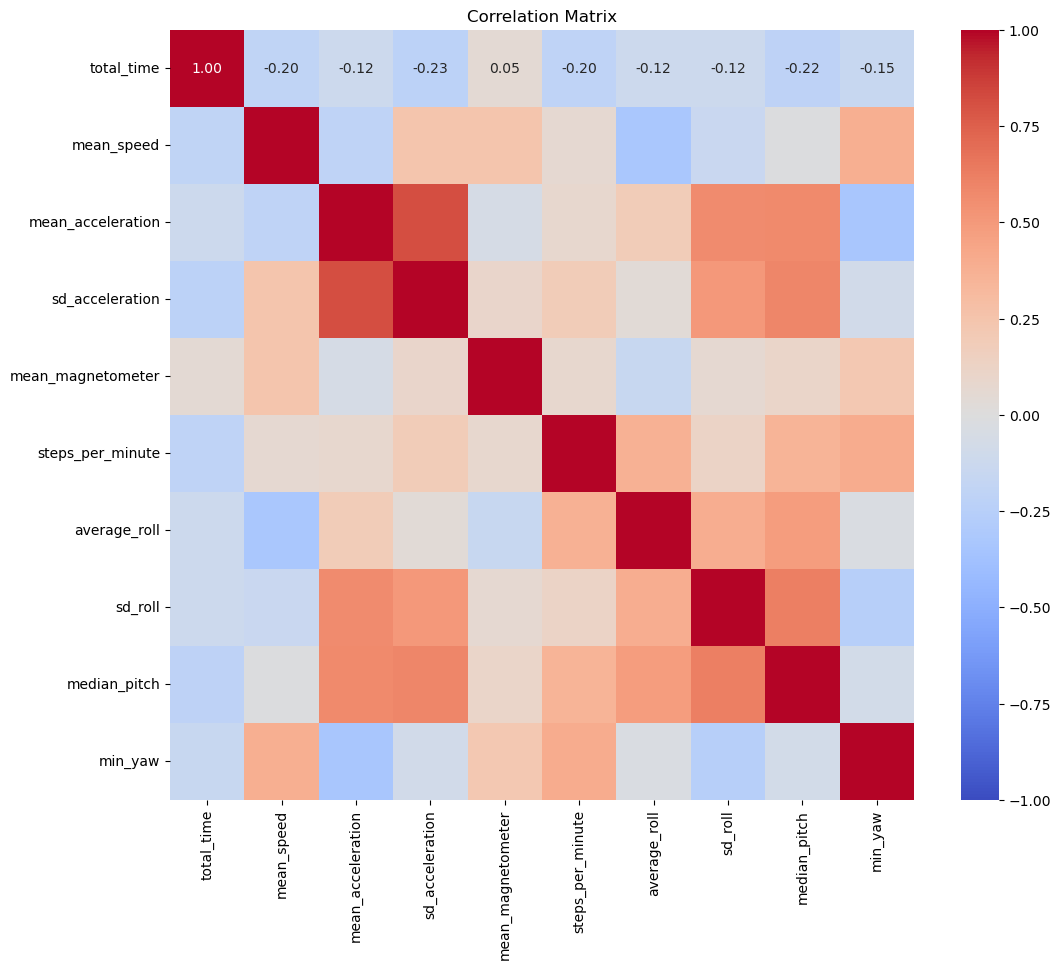

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_result.loc[:, reduced_result.columns != 'id'].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            center=0, 
            vmin=-1, 
            vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Boxplots for every column

In [9]:
def plot_boxplots(df):
    num_cols = len(df.columns)
    
    num_rows = (num_cols + 2) // 3  # Round up to the nearest integer
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)
        plt.boxplot(df[col])
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

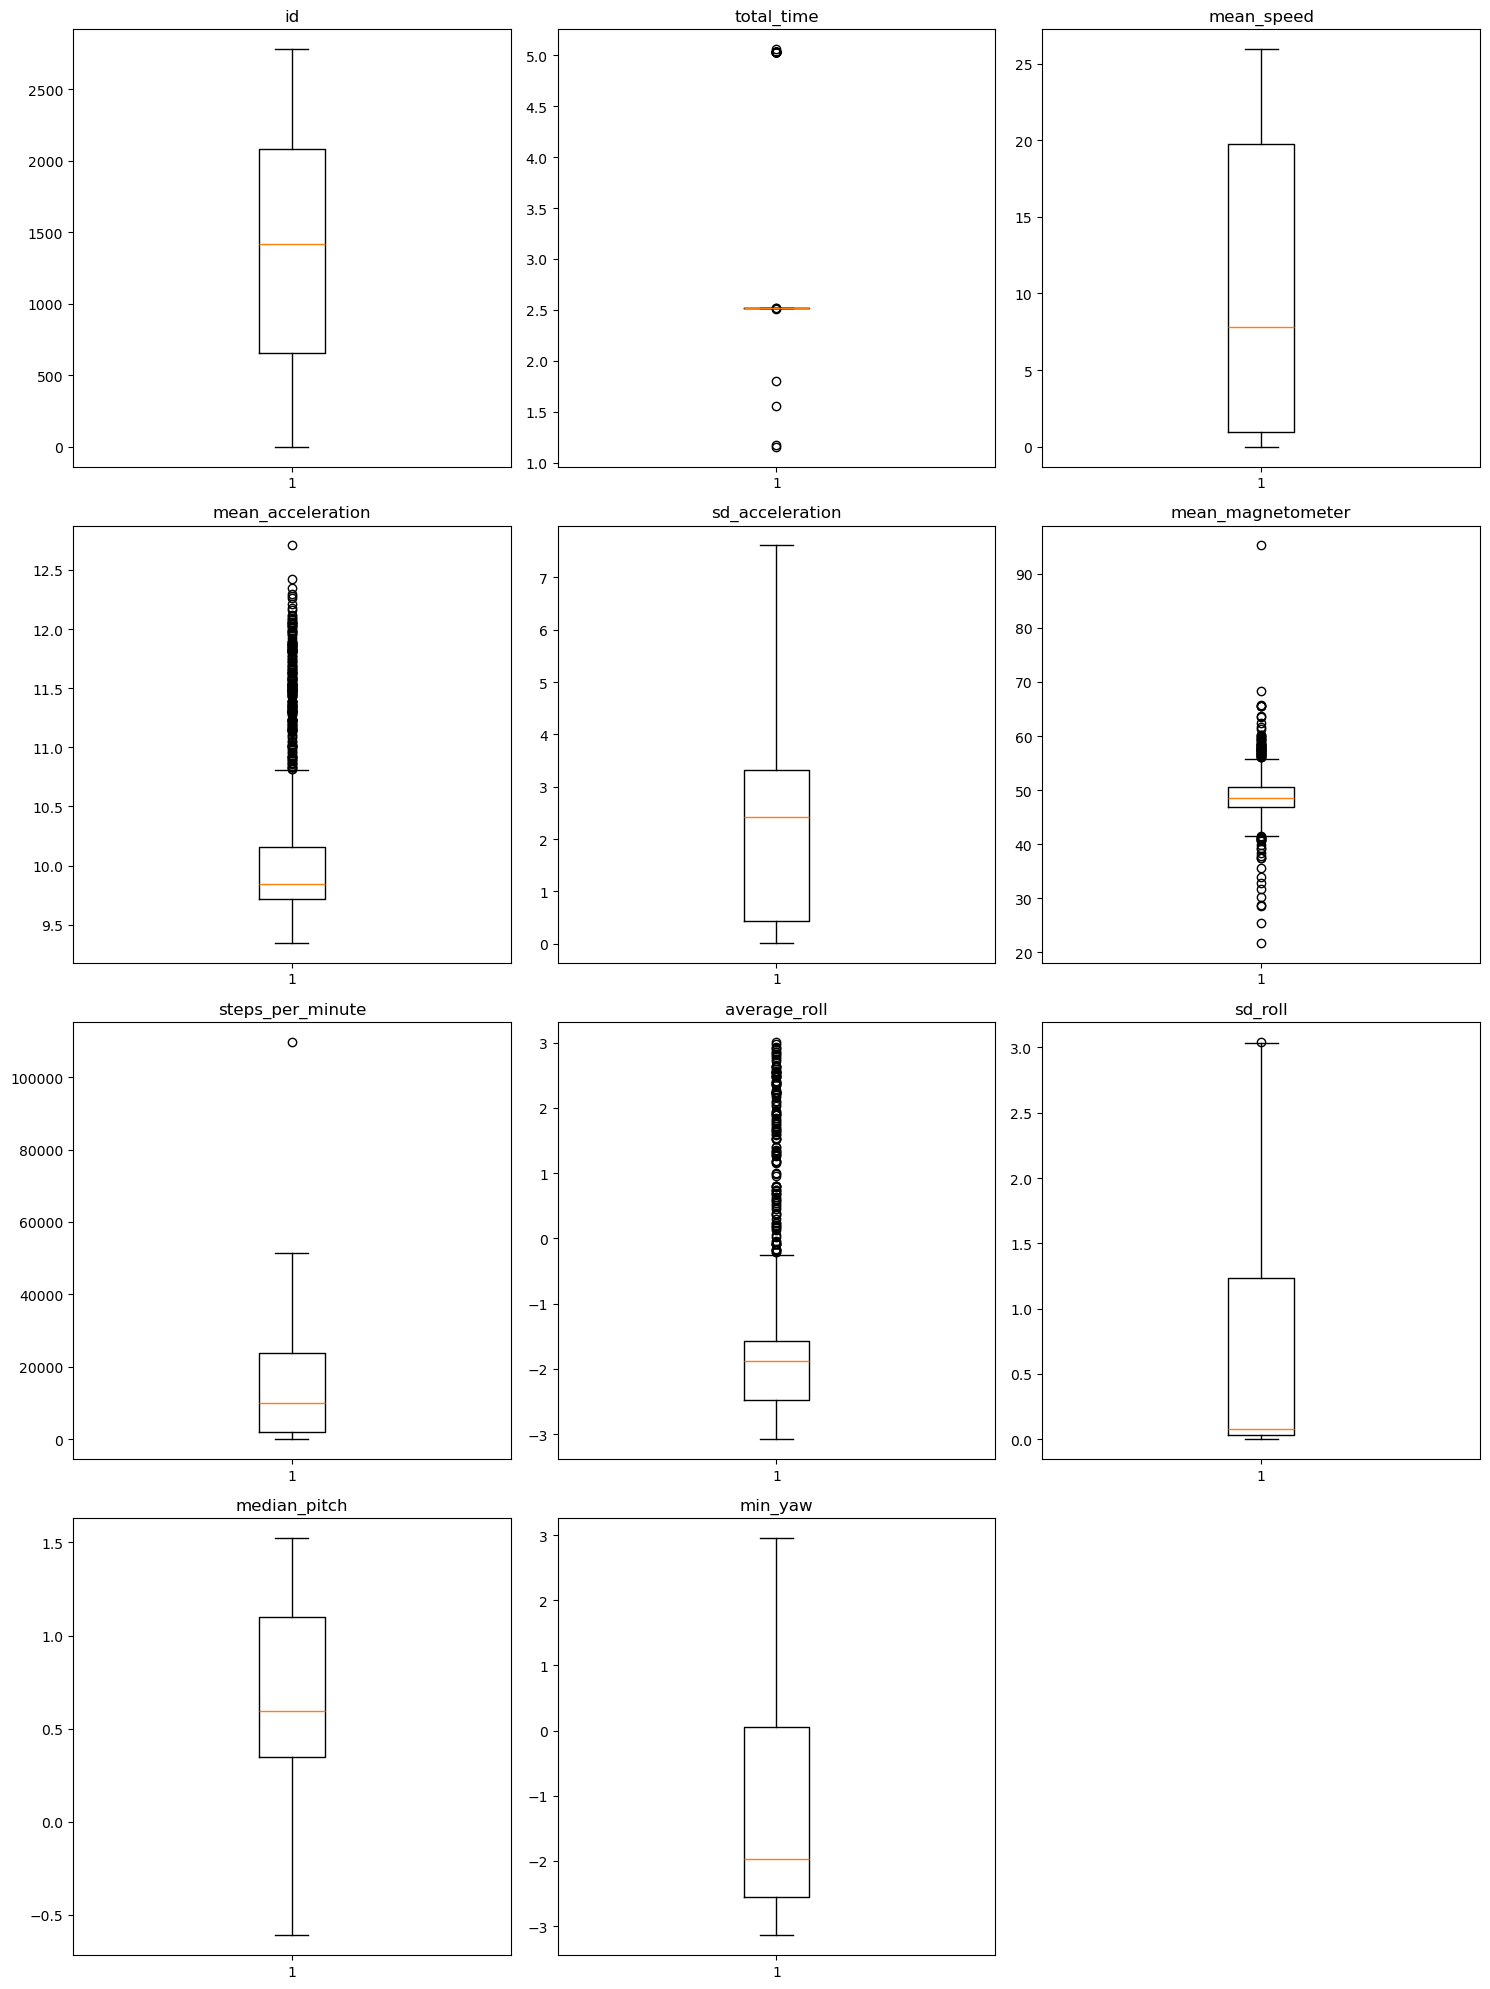

In [10]:
plot_boxplots(reduced_result)

We need to modify outliers in total_time and mean_magnetometer.

In [11]:
def replace_outliers_with_quantile(df):
    time_quantile = df['total_time'].quantile(0.95)
    magneto_quantile = df['mean_magnetometer'].quantile(0.95)
    
    df.loc[df['total_time'] > time_quantile, 'total_time'] = time_quantile
    
    df.loc[df['mean_magnetometer'] > magneto_quantile, 'mean_magnetometer'] = magneto_quantile
    
    return df

In [12]:
replace_outliers_with_quantile(reduced_result)

,id,total_time,mean_speed,mean_acceleration,sd_acceleration,mean_magnetometer,steps_per_minute,average_roll,sd_roll,median_pitch,min_yaw
0,1.0,2.516568,5.173939e+00,11.128816,3.732603,54.378529,238.419943,-2.402241,0.274933,1.183848,-0.924110
1,2.0,2.516605,3.189363e+00,9.987097,2.310040,50.703331,238.416438,-2.496963,0.157744,0.463072,0.154463
2,4.0,2.516632,1.808818e+01,9.887447,2.411183,54.378529,286.096656,-2.761200,0.115934,0.909612,0.730423
3,6.0,2.516546,2.345041e+01,10.165091,3.804351,54.378529,429.159650,-2.652932,1.056906,0.955169,0.692381
4,7.0,2.516518,2.408345e+01,9.919805,4.656513,54.378529,548.376765,-2.900108,0.114005,1.084632,0.722495
...,...,...,...,...,...,...,...,...,...,...,...
1357,2775.0,2.516874,6.613088e-34,9.711081,0.083760,47.041843,35496.187756,-2.788460,0.008825,-0.256091,2.785836
1358,2776.0,2.516874,2.389216e-36,9.713042,0.111261,47.278723,35496.286478,-2.758431,0.035709,-0.256462,2.704930
1359,2777.0,2.516874,8.063703e-40,9.713457,0.043896,46.980630,35496.371098,-2.694629,0.003280,-0.250087,2.725769
1360,2778.0,2.516874,9.794135e-43,9.747030,0.482260,47.180419,35496.413408,-2.711286,0.013943,-0.245037,2.577463


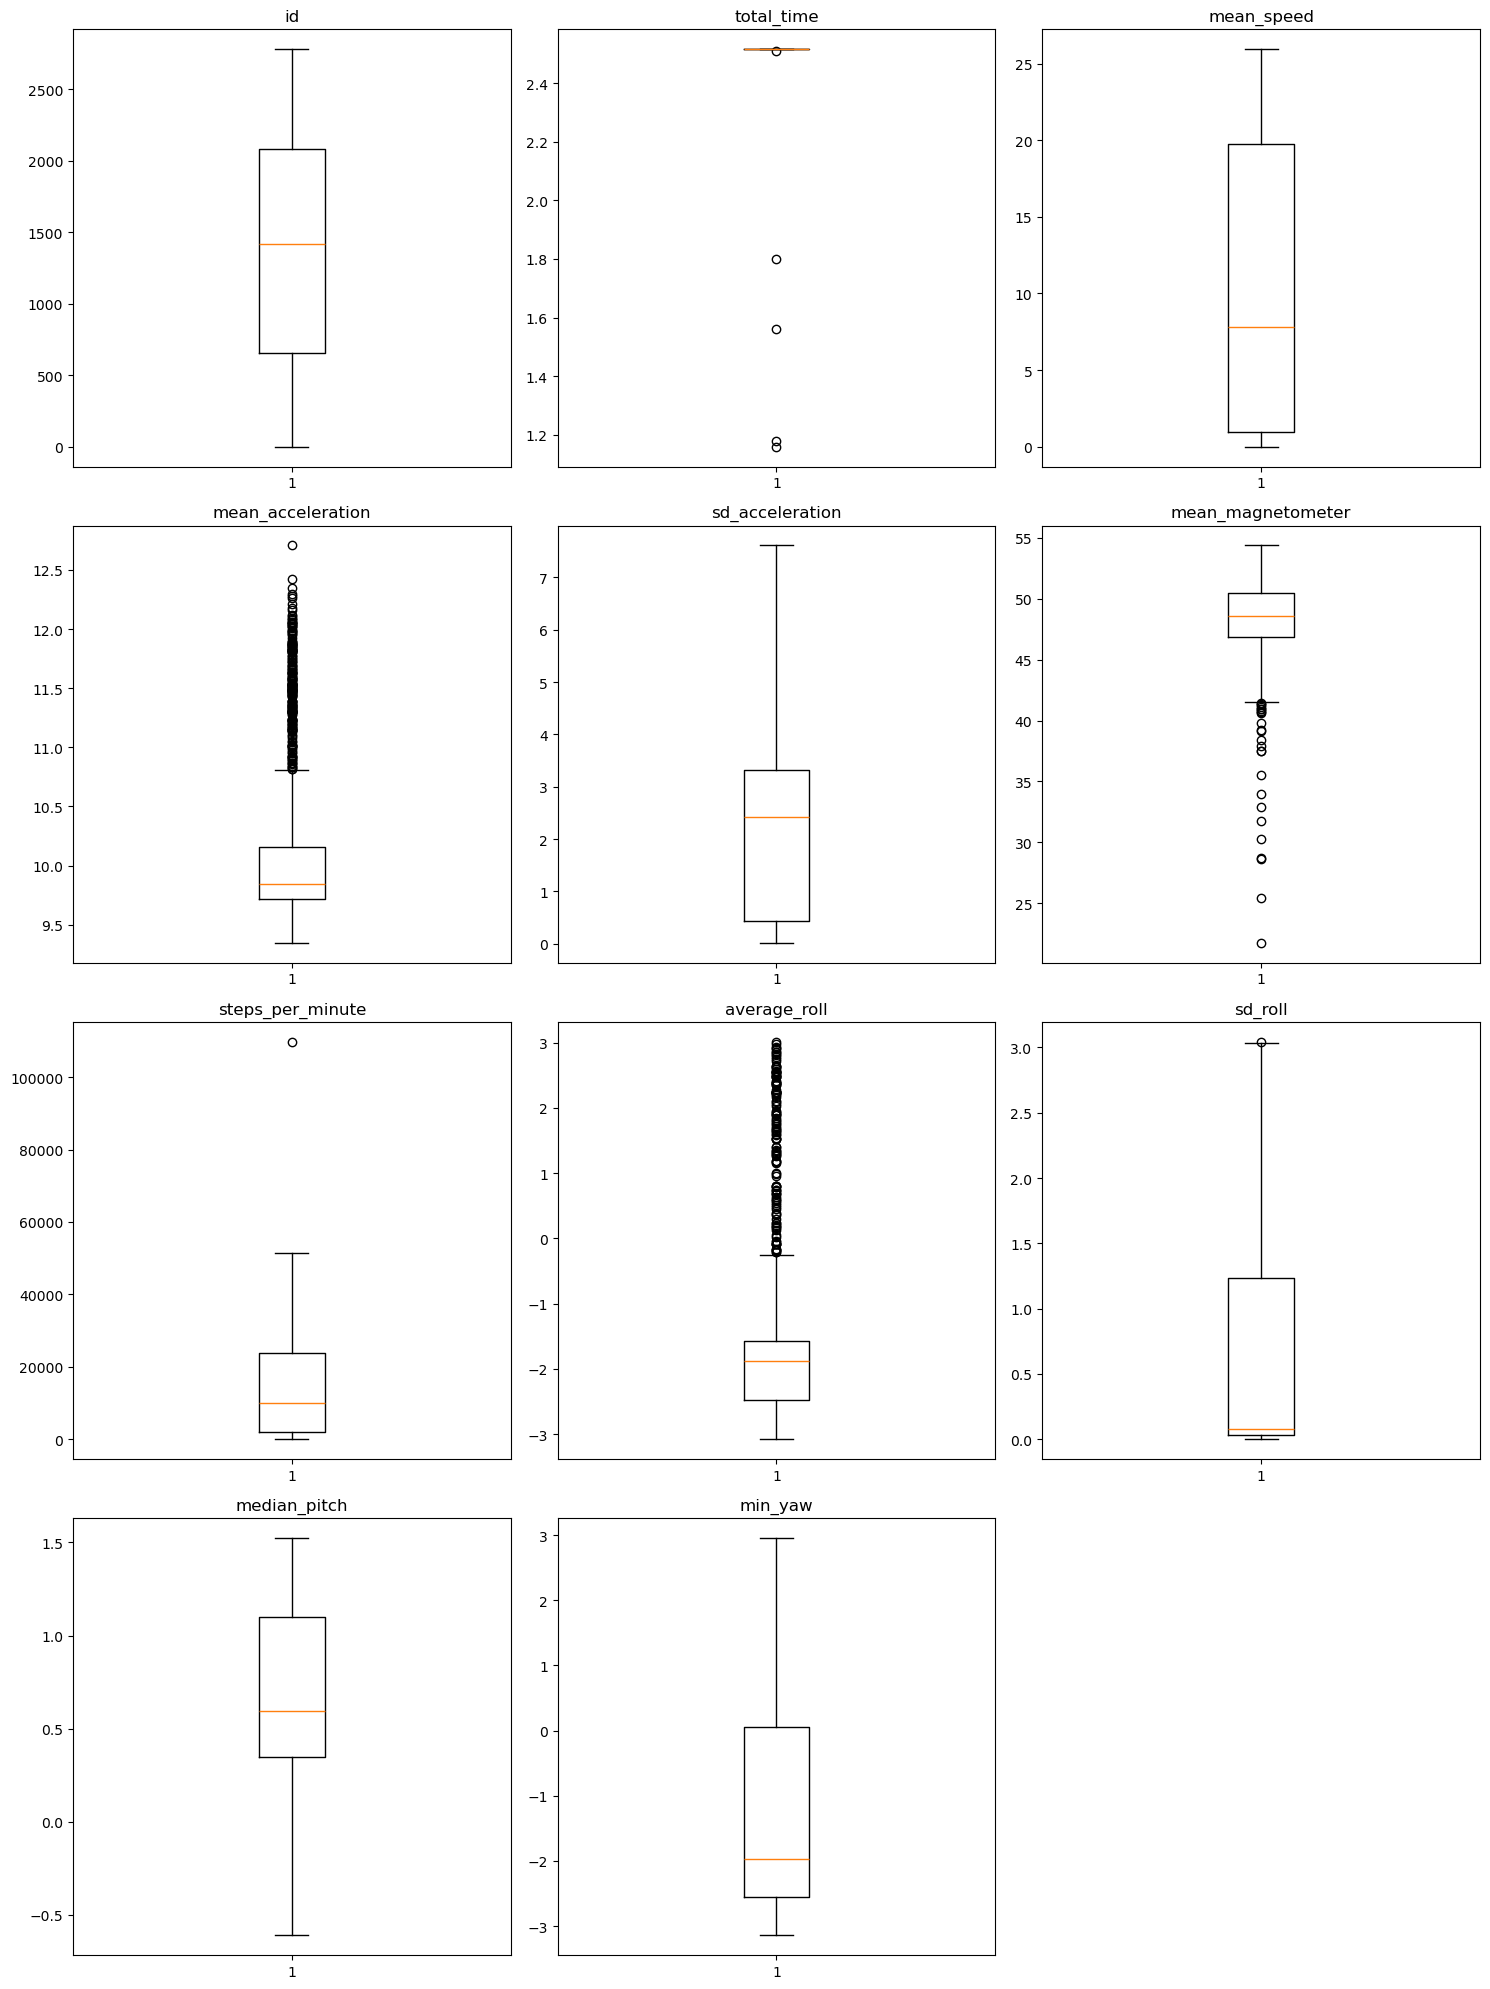

In [13]:
plot_boxplots(reduced_result)

We don't want to analyze activities shorter than 1 second, so we will remove them from the dataset.

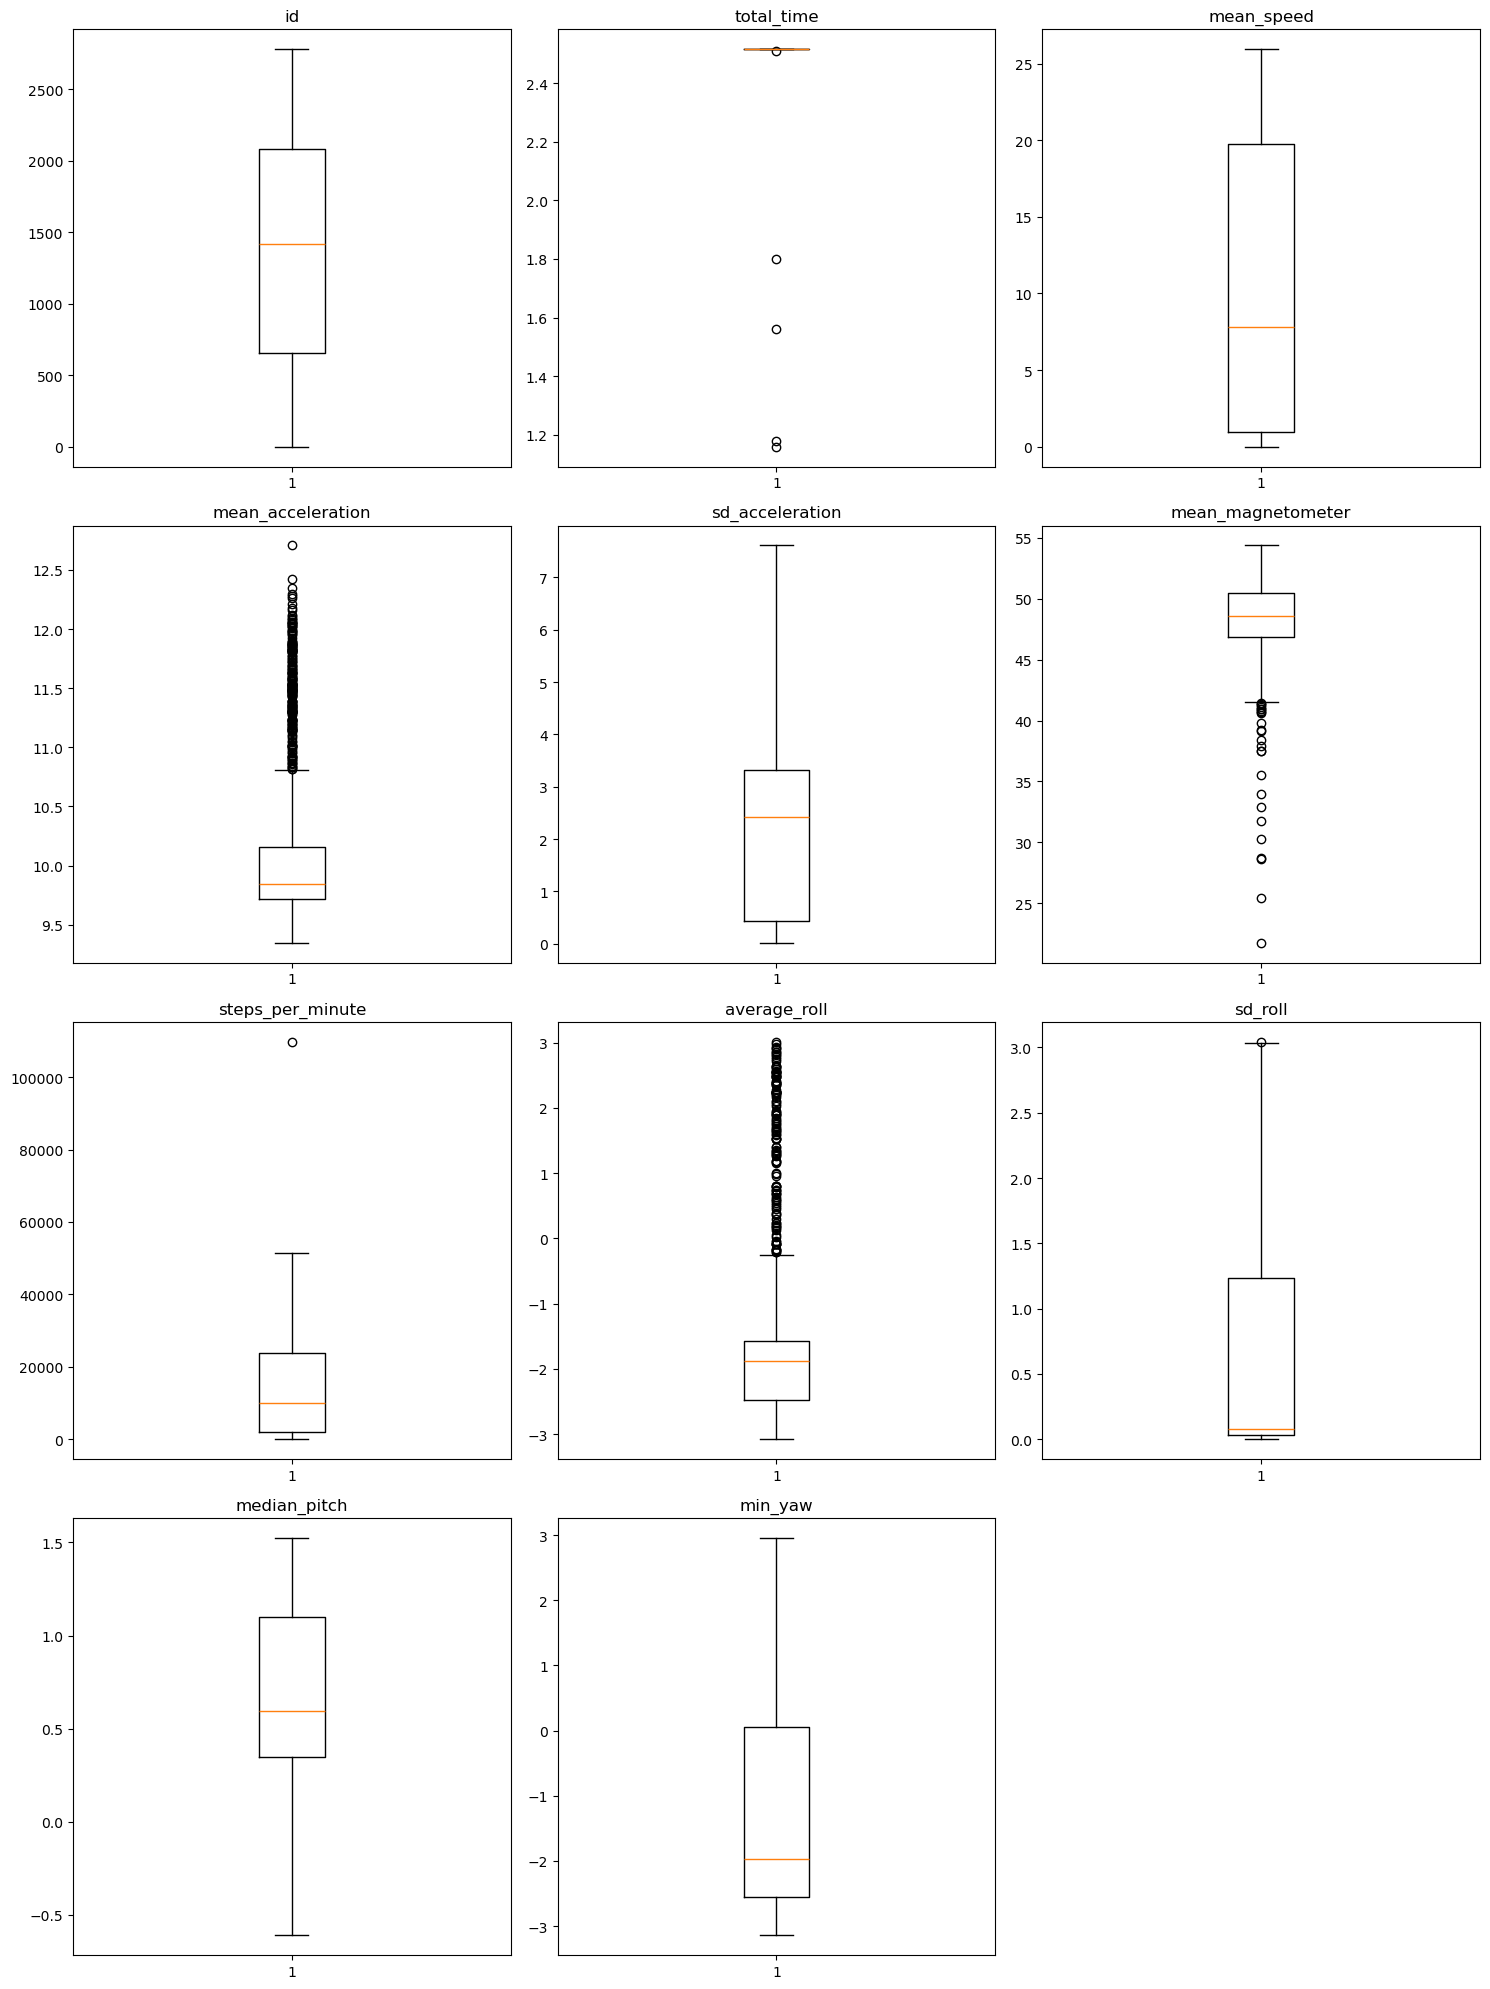

In [14]:
time_min = 1
Y_train.drop(reduced_result[reduced_result['total_time'] < time_min].index, inplace=True)
reduced_result.drop(reduced_result[reduced_result['total_time'] < time_min].index, inplace=True)

plot_boxplots(reduced_result)


## **Models**

Real labels from dataset.

In [15]:
real_labels = Y_train['act_type']


We can now drop id from our data frame.

In [16]:
reduced_result.drop(columns=['id'], inplace=True)

### Elbow method

Number of clusters: 2, Inertia: 62912866904.98134
Number of clusters: 3, Inertia: 30639200452.01997
Number of clusters: 4, Inertia: 20080908873.000755
Number of clusters: 5, Inertia: 13045235616.636366
Number of clusters: 6, Inertia: 8988488865.522741
Number of clusters: 7, Inertia: 5906504575.746793
Number of clusters: 8, Inertia: 4238837907.1599264
Number of clusters: 9, Inertia: 3432678144.9494195
Number of clusters: 10, Inertia: 2618897717.257372


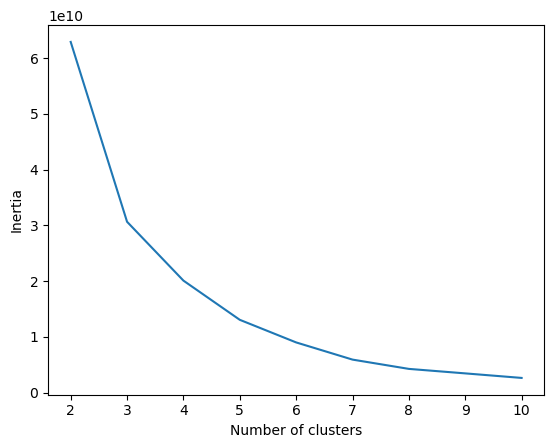

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(reduced_result)
    labels = kmeans.predict(reduced_result)
    print(f'Number of clusters: {i}, Inertia: {kmeans.inertia_}')
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


### Silhouette score

In [18]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k,random_state=42)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

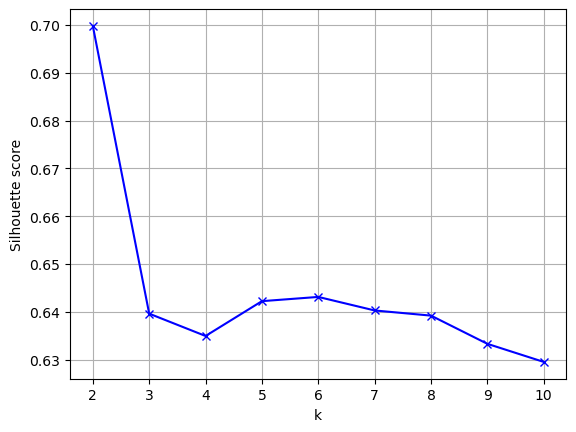

In [19]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Davies-Bouldin score

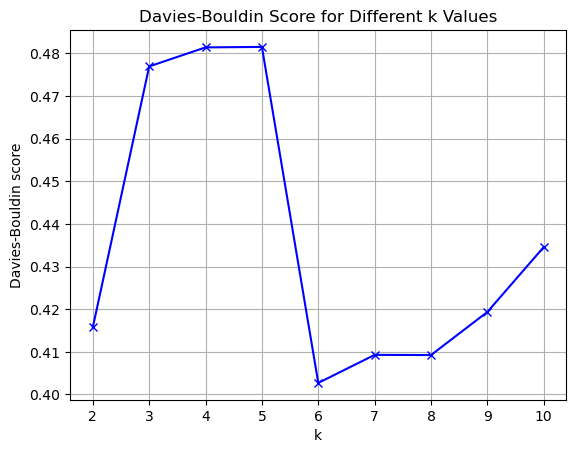

In [20]:
cluster_num_seq = range(2, 11)
#davies_bouldin_vec = count_clustering_scores(df, cluster_num_seq, KMeans, davies_bouldin_score)

davies_bouldin_vec = []
for k in cluster_num_seq:
    kmeans = KMeans(n_clusters=k,random_state=42)
    davies_bouldin_vec.append(davies_bouldin_score(reduced_result, kmeans.fit_predict(reduced_result)))


plt.plot(cluster_num_seq, davies_bouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Caliński-Harabasz score

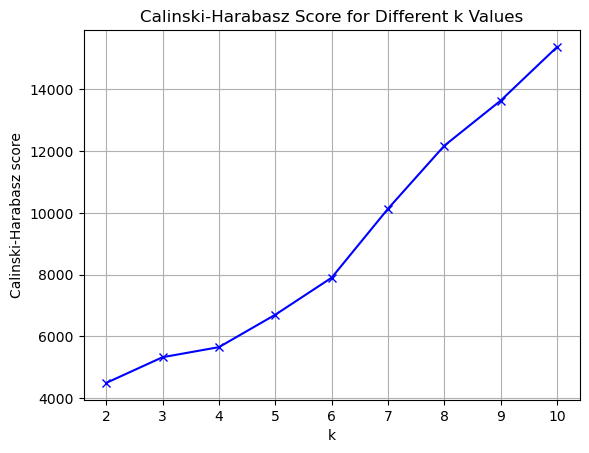

In [21]:
cluster_num_seq = range(2, 11)

calinski_harabasz_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, calinski_harabasz_score)

plt.plot(cluster_num_seq, calinski_harabasz_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz score')
plt.title('Calinski-Harabasz Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

We set n_clusters = 3

In [22]:
n_clusters = 3

In [23]:
real_color_labels = ['yellow' if real_labels.iloc[i] == 0 else 'blue' if real_labels.iloc[i] == 1 else 'green' for i in range(len(real_labels))]
real_color_labels

['yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',

### Function to do KMeans clustering

In [36]:
from sklearn import metrics
def doKmeans(X, nclust=n_clusters, xaxis = 2, yaxis = 6, real = False,  multidimensional = False, zaxis = 4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X).flatten()
    centers = model.cluster_centers_
    
    color_labels = ['yellow' if clust_labels[i] == 0 else 'blue' if clust_labels[i] == 1 else 'green' for i in range(len(clust_labels))]
    
    print(f"Model inertia: {model.inertia_}")
    print("Accuracy: ", np.mean(real_labels == clust_labels))
    print("Silhouette scre:" , silhouette_score(X, clust_labels))
    print("Davies Bouldin Score:" , davies_bouldin_score(X, clust_labels))
    print("Calinski Harabasz Score:" , calinski_harabasz_score(X, clust_labels))
    print()
    
    
    
    # i = 0
    # for label in real_labels:
    #     if label == 0:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='o', c=color_labels[i], s=50)
    #     elif label == 1:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='s', c=color_labels[i], s=50)
    #     elif label == 2:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='^', c=color_labels[i], s=50)
    #     i += 1
    
        
    plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=color_labels, s=50, cmap='viridis')

    plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering with Centroids')
    plt.show()
    
    if real:
        plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=real_color_labels, s=50, cmap='viridis')

        plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('K-means Clustering with Centroids')
        plt.show()
        
    if multidimensional:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()
        
    if multidimensional & real:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=real_color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()

    sc = metrics.silhouette_score(X, clust_labels)
    print("Silhouette Coefficient:%0.2f" % sc)

    return clust_labels

### Tests

Basic

Model inertia: 30639200452.019962
Accuracy:  0.30469897209985314
Silhouette scre: 0.639616893181982
Davies Bouldin Score: 0.47697127206058393
Calinski Harabasz Score: 5326.809642772132



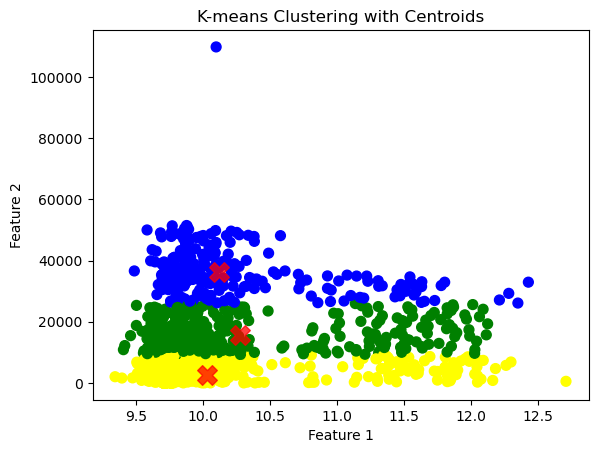

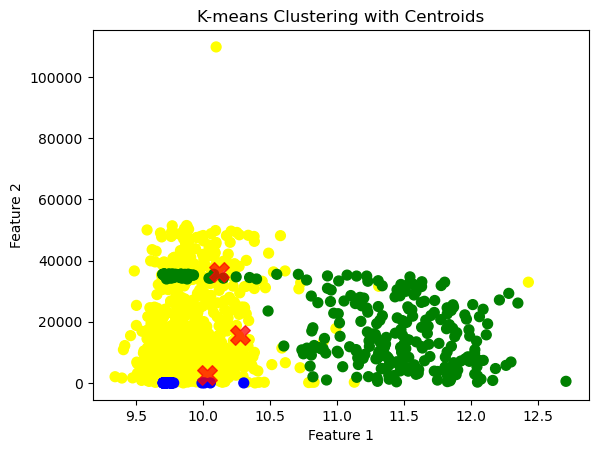

Silhouette Coefficient:0.64


In [37]:
x = reduced_result.copy()
clust_labels = doKmeans(x, n_clusters, 2, 5, True)


Standarization

Model inertia: 7996.794797060081
Accuracy:  0.05947136563876652
Silhouette scre: 0.35230305203563406
Davies Bouldin Score: 1.1953730025687432
Calinski Harabasz Score: 477.81242764943806



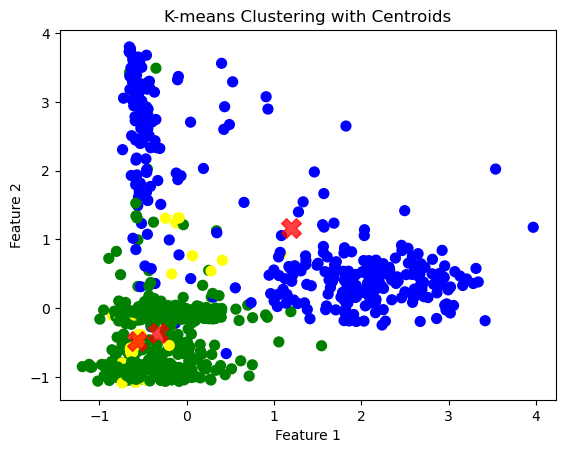

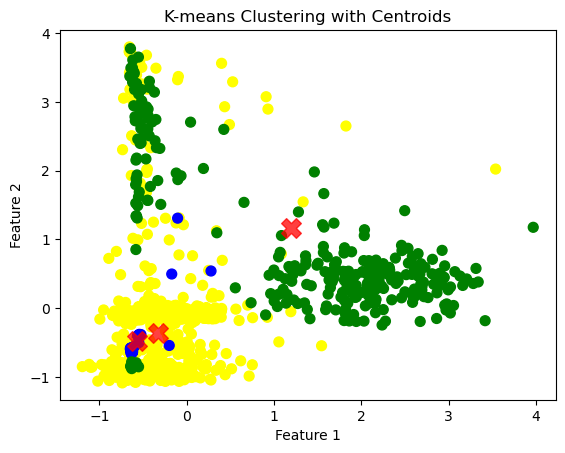

Silhouette Coefficient:0.35


In [38]:
x = reduced_result.copy()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 2, 6, True)


Normalization

Model inertia: 0.6810378757207527
Accuracy:  0.43392070484581496
Silhouette scre: 0.9325853775159909
Davies Bouldin Score: 0.31526258877143226
Calinski Harabasz Score: 422407.81013756956



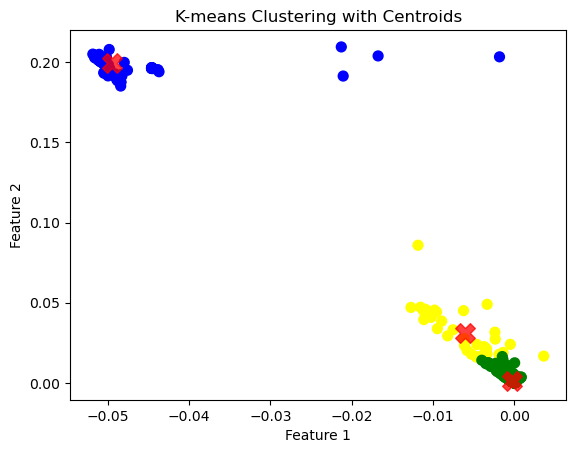

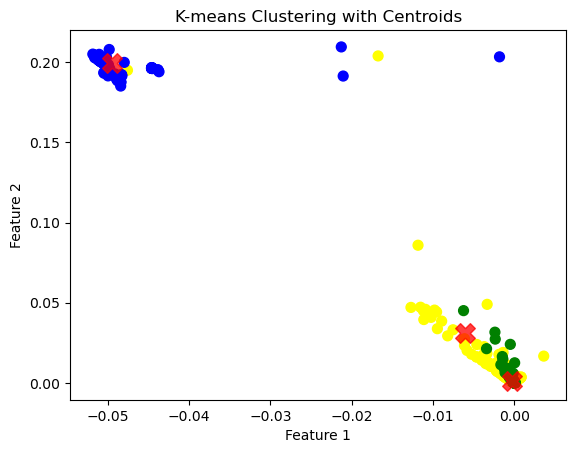

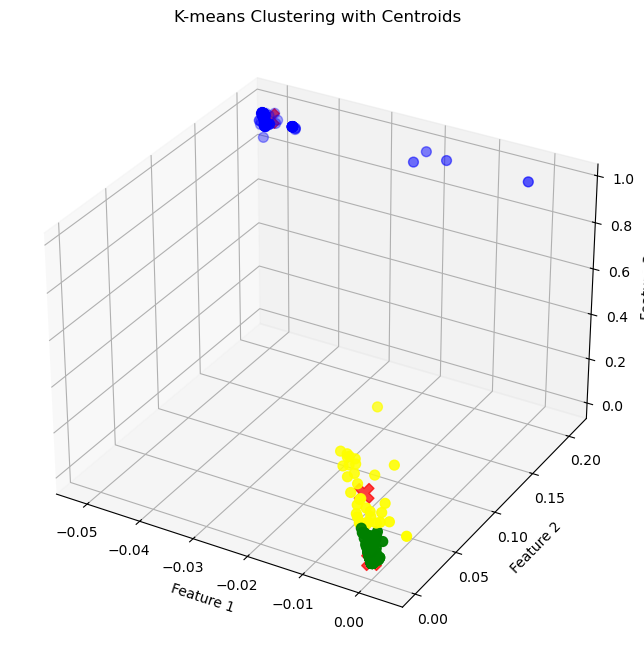

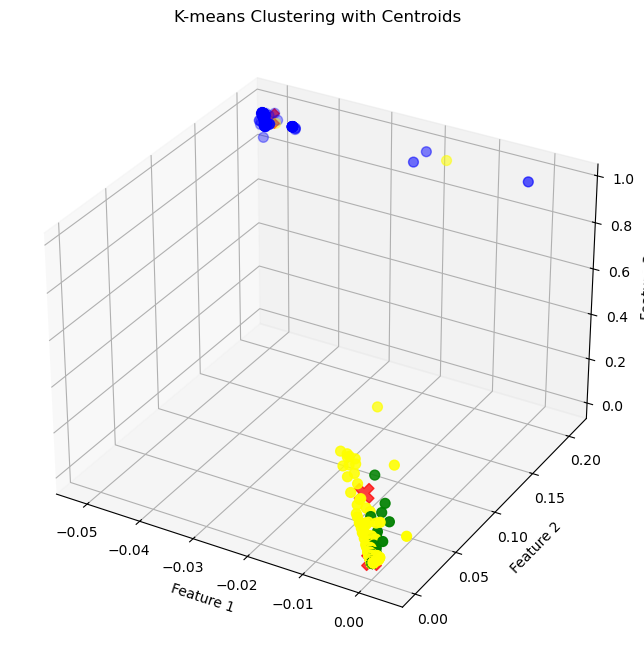

Silhouette Coefficient:0.93


In [39]:
x = reduced_result.copy()
normalizer = Normalizer()
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels_norm = doKmeans(x, n_clusters, 6, 2, True, True, 4)

Normalization + standarization

Model inertia: 713.9024566514283
Accuracy:  0.2701908957415565
Silhouette scre: 0.3654508215464883
Davies Bouldin Score: 1.2288236247664146
Calinski Harabasz Score: 596.5578809516314



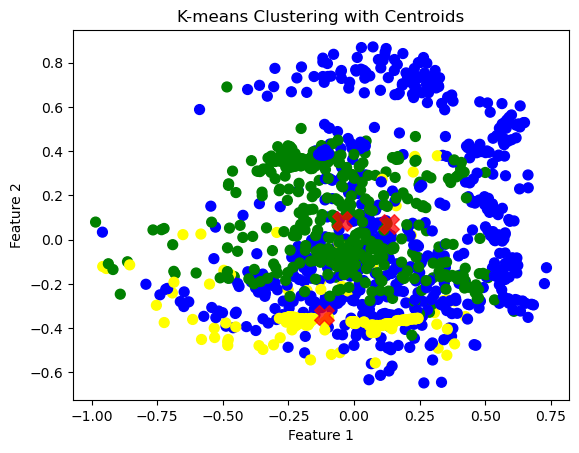

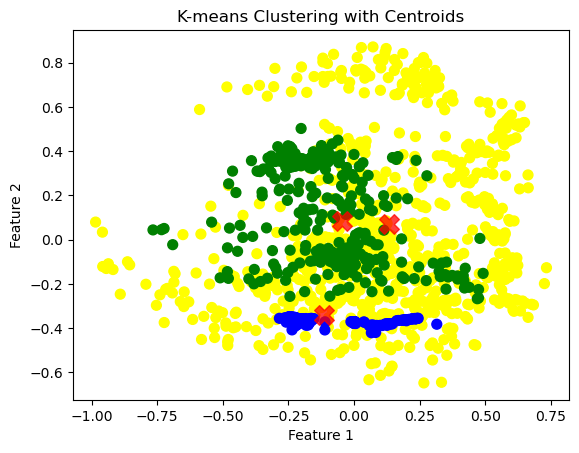

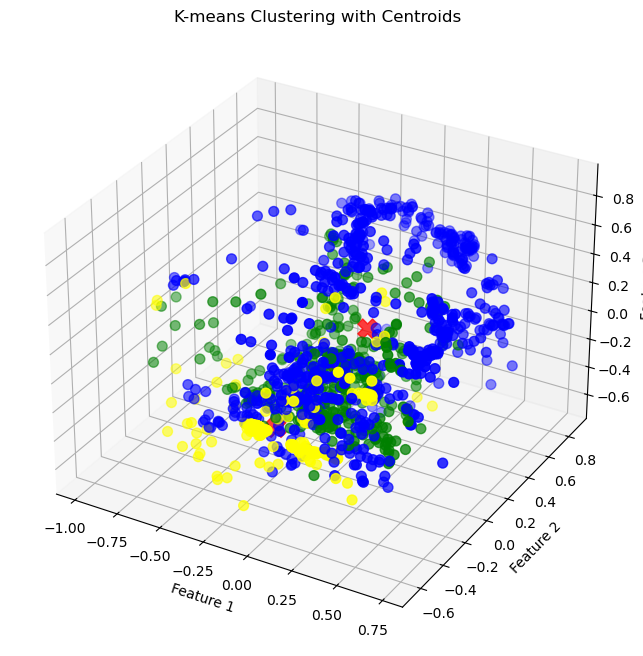

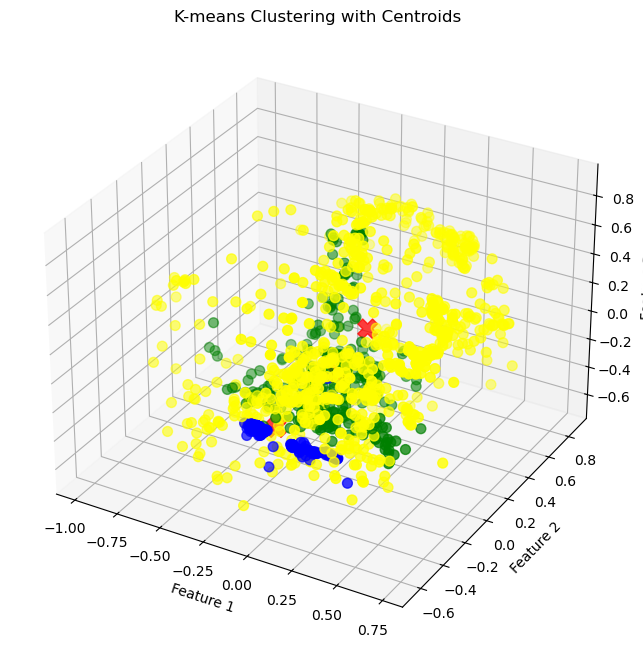

Silhouette Coefficient:0.37


In [40]:
x = reduced_result.copy()
normalizer = Normalizer()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 4, 5, True, True, 9)

PowerTransformer

Model inertia: 6389.811169415587
Accuracy:  0.23715124816446403
Silhouette scre: 0.40994831429754525
Davies Bouldin Score: 1.0997987269484018
Calinski Harabasz Score: 624.0300698505306



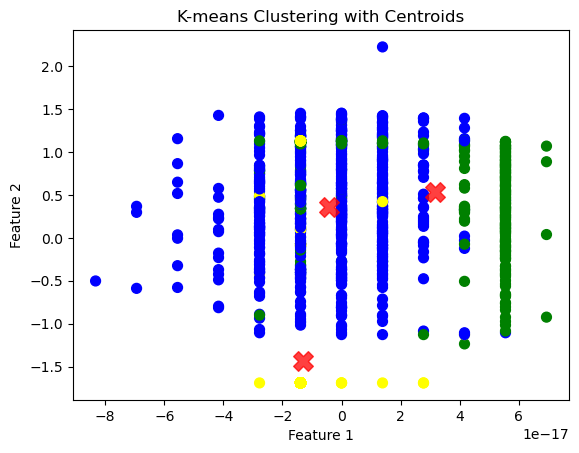

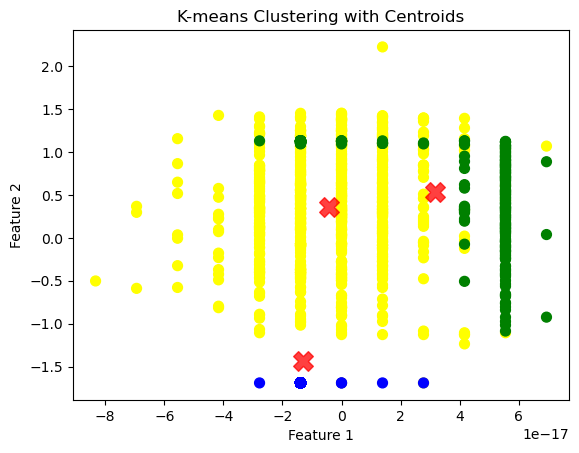

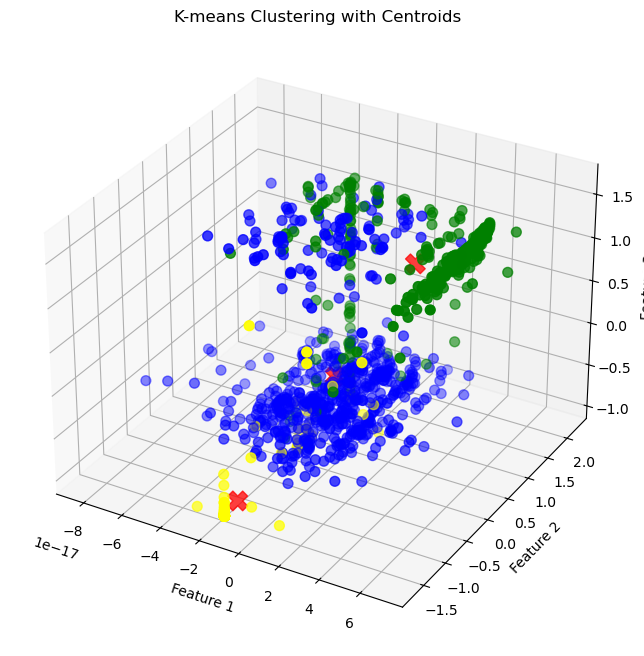

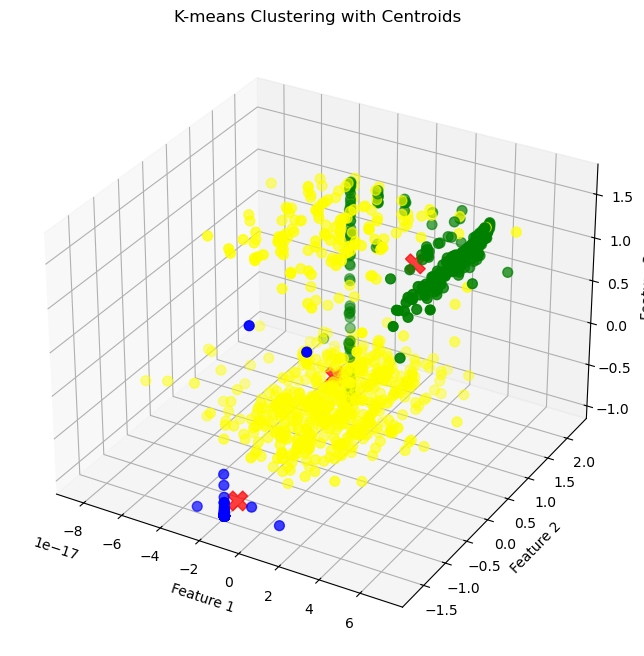

Silhouette Coefficient:0.41


In [41]:
x = reduced_result.copy()
powerTransformer = PowerTransformer()
x = powerTransformer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 2, 5, True, True, 7)

### PCA

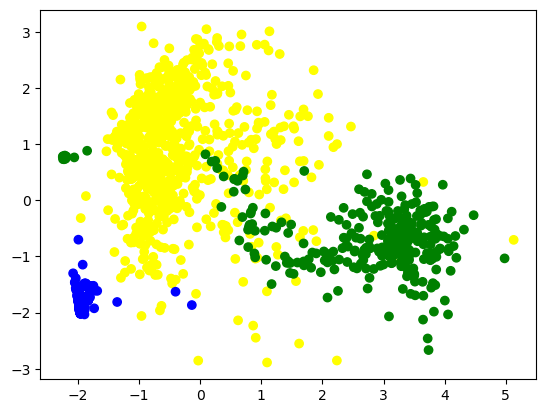

Model inertia: 1862.16758335341
Accuracy:  0.4787077826725404
Silhouette scre: 0.46428992828289595
Davies Bouldin Score: 0.9991481419484739
Calinski Harabasz Score: 811.4705360675226



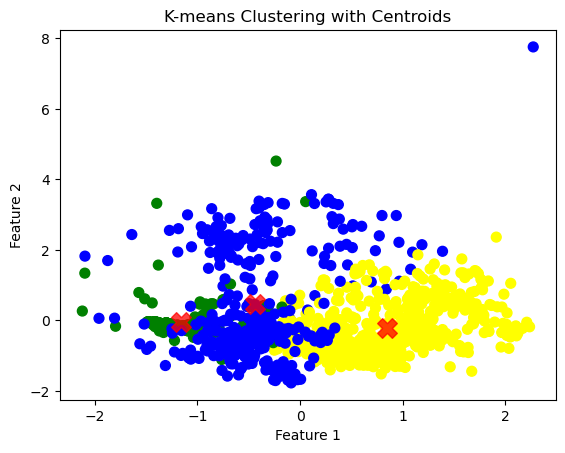

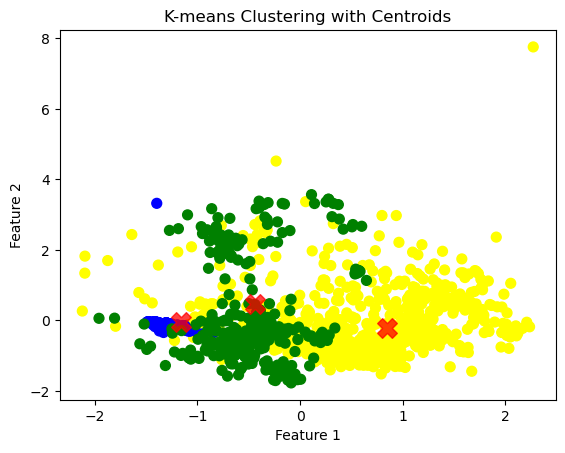

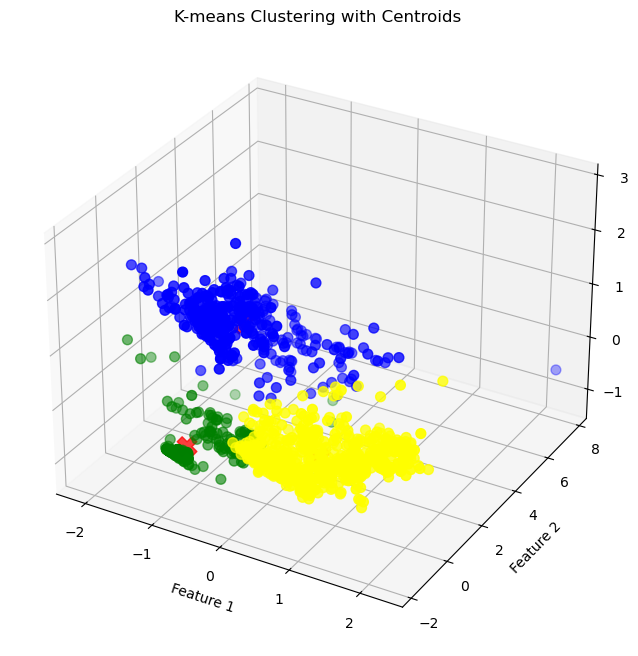

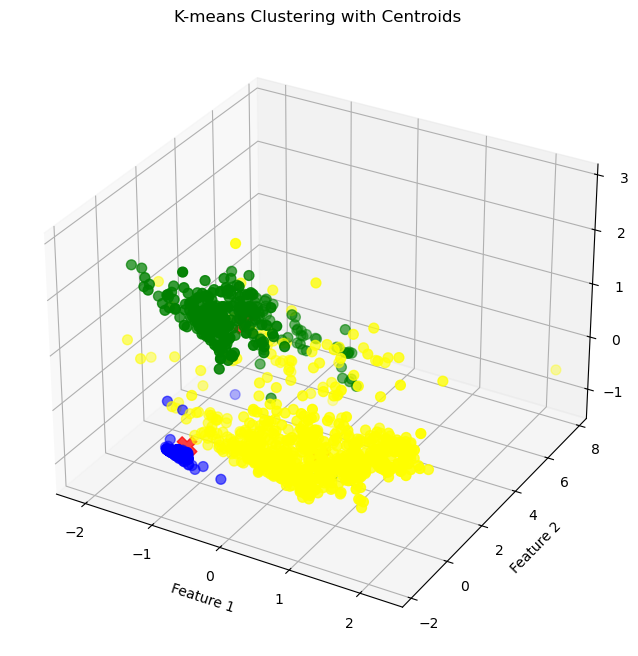

Silhouette Coefficient:0.46


In [42]:
scaler = StandardScaler()
x = reduced_result.copy()
x = scaler.fit_transform(x)

model = PCA(n_components=3)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
x = pd.DataFrame(transformed)
scaler2 = StandardScaler()
x = scaler2.fit_transform(x)
x = pd.DataFrame(x)
plt.scatter(xs,ys,c=real_color_labels)  
plt.show()
clust_labels = doKmeans(x, n_clusters, 1, 2, True, True, 0)

### Explained variance for PCA

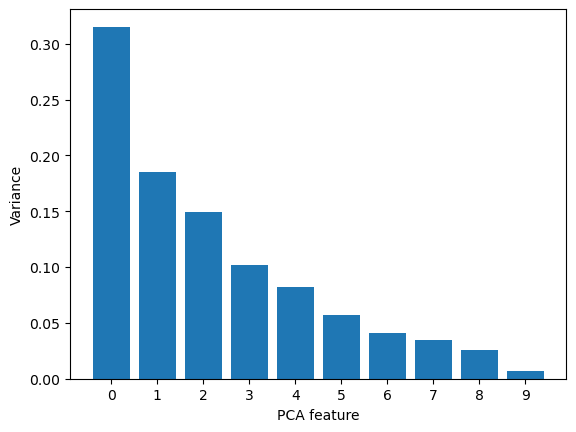

In [43]:
x = reduced_result.copy()
scaler = StandardScaler()

x = scaler.fit_transform(x)
model = PCA()
model.fit(x)

features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()


### TSNE

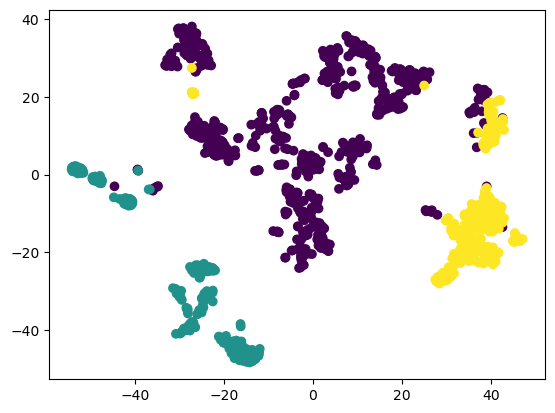

In [44]:
scaler = StandardScaler()


x = reduced_result.copy()
x = scaler.fit_transform(x)

model = TSNE(learning_rate=100)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=real_labels)
plt.show()

### DBSCAN

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

['y', 'b', 'g', 'r']


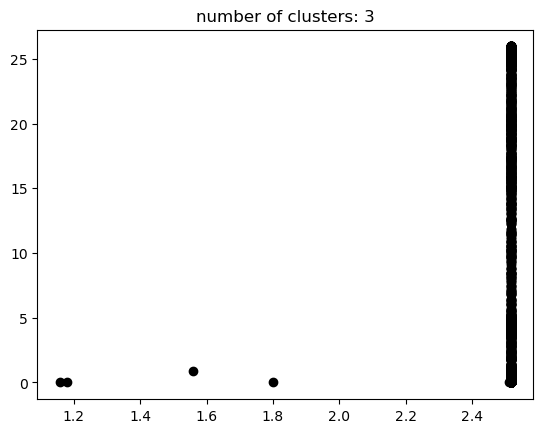

In [48]:
X = reduced_result.copy()
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
 
# Plot result
 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
 
    class_member_mask = (labels == k)
 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [50]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)


Silhouette Coefficient:0.01


### Normalization approach seems to be the best and now we are trying to get the meaning of clusters

In [59]:
df = reduced_result.copy()

sorted_data = df.sort_values('steps_per_minute', ascending=False)
sorted_data

,total_time,mean_speed,mean_acceleration,sd_acceleration,mean_magnetometer,steps_per_minute,average_roll,sd_roll,median_pitch,min_yaw
633,1.179098,2.184691e-03,10.099107,0.506872,51.795396,109812.755174,-0.208168,0.013320,-0.414241,1.348932
632,2.516815,9.536739e+00,9.878557,0.370894,47.587451,51445.974376,-1.623778,0.070019,0.807386,1.267551
631,2.516816,1.718872e+01,9.771838,2.771501,46.938012,51350.595355,-1.844689,0.097217,0.364936,2.173739
630,2.516814,1.626678e+01,9.883394,3.224740,46.197140,51207.598178,-1.760959,0.073757,0.370842,2.166262
629,2.516815,1.390427e+01,9.863634,3.371861,44.491649,50468.548543,-1.784755,0.080741,0.442601,2.210825
...,...,...,...,...,...,...,...,...,...,...
963,2.516519,5.170542e-01,9.703408,0.024617,46.768246,0.000000,-2.455190,0.002364,-0.050965,-2.389242
962,2.516482,1.418592e-15,9.715778,0.020142,46.898436,0.000000,-2.456459,0.000616,-0.051875,-2.401860
961,2.516481,1.418592e-15,9.717863,0.022632,46.922095,0.000000,-2.456260,0.001441,-0.051801,-2.402301
960,2.516481,1.418592e-15,9.716622,0.023078,46.856422,0.000000,-2.455966,0.001564,-0.051799,-2.401994


In [56]:
clust_labels_norm

array([2, 2, 2, ..., 0, 0, 0])

In [57]:
df = reduced_result.copy()
df['cluster'] = clust_labels_norm

In [ ]:
pd.Series({
            'average_yaw': df['Orientation_yaw'].mean(),  # Average yaw
            'median_yaw': df['Orientation_yaw'].median(),  # Median yaw
            'min_yaw': df['Orientation_yaw'].min(),  # Minimum yaw
            'max_yaw': df['Orientation_yaw'].max(),  # Maximum yaw
            'sd_yaw': df['Orientation_yaw'].std()  # Standard deviation of yaw
        })


In [60]:
unique_labels = np.unique(clust_labels_norm)

for label in unique_labels:
    cluster_data = df[clust_labels_norm == label]
    cluster_mean = cluster_data.mean()
    cluster_median = cluster_data.median()
    cluster_std = cluster_data.std()
    
    print(f"Cluster {label} Summary:")
    print("Mean:")
    print(cluster_mean)
    print("Median:")
    print(cluster_median)
    print("Standard Deviation:")
    print(cluster_std)
    print("\n")

Cluster 0 Summary:
Mean:
total_time               2.513367
mean_speed              12.966031
mean_acceleration       10.215687
sd_acceleration          2.939017
mean_magnetometer       48.849848
steps_per_minute     18069.245121
average_roll            -1.540505
sd_roll                  0.707289
median_pitch             0.818185
min_yaw                 -0.943318
dtype: float64
Median:
total_time               2.516563
mean_speed              14.870746
mean_acceleration        9.925553
sd_acceleration          2.678494
mean_magnetometer       48.898087
steps_per_minute     14020.591353
average_roll            -1.787809
sd_roll                  0.108517
median_pitch             0.853879
min_yaw                 -0.869162
dtype: float64
Standard Deviation:
total_time               0.062448
mean_speed               9.175139
mean_acceleration        0.689695
sd_acceleration          1.723326
mean_magnetometer        3.363508
steps_per_minute     13550.962612
average_roll             1.341462

Based on the provided data, we can attempt to characterize the activity groups represented by the three clusters. Here is the analysis of each cluster:

### Cluster 0
**Mean Values:**
- Total time: 2.51 minutes
- Mean speed: 12.97 m/s
- Mean acceleration: 10.22 m/s²
- Standard deviation of acceleration: 2.94 m/s²
- Mean magnetometer value: 48.85
- Steps per minute: 18069.25
- Average roll: -1.54
- Standard deviation of roll: 0.71
- Median pitch: 0.82
- Minimum yaw: -0.94

**Characteristics:**
- High number of steps per minute, suggesting intense activity such as running or cycling.
- Relatively high mean speed and acceleration.
- Stable acceleration (low standard deviation).

### Cluster 1
**Mean Values:**
- Total time: 2.51 minutes
- Mean speed: 1.01 m/s
- Mean acceleration: 9.73 m/s²
- Standard deviation of acceleration: 0.07 m/s²
- Mean magnetometer value: 47.62
- Steps per minute: 0
- Average roll: -2.41
- Standard deviation of roll: 0.01
- Median pitch: -0.05
- Minimum yaw: -2.47

**Characteristics:**
- Zero steps per minute, indicating no movement, e.g., sitting or standing still.
- Very low mean speed and low standard deviation of acceleration.
- Stability in movement (low standard deviation of roll and pitch).

### Cluster 2
**Mean Values:**
- Total time: 2.52 minutes
- Mean speed: 14.13 m/s
- Mean acceleration: 10.32 m/s²
- Standard deviation of acceleration: 3.45 m/s²
- Mean magnetometer value: 49.90
- Steps per minute: 385.57
- Average roll: -1.94
- Standard deviation of roll: 0.70
- Median pitch: 0.78
- Minimum yaw: -1.08

**Characteristics:**
- Average number of steps per minute, suggesting moderate activity, such as walking.
- High mean speed and acceleration, similar to Cluster 0, but lower step count.
- Greater variability in movement (higher standard deviation of acceleration).

### Summary
1. **Cluster 0:** High-intensity activity (likely running or cycling).
2. **Cluster 1:** No physical activity (sitting or standing still).
3. **Cluster 2:** Moderate physical activity (likely walking).

Each cluster represents different levels of intensity and types of physical activity, ranging from intense running, to no movement, to moderate walking.
